In [1]:
import matplotlib.pyplot as plt
import torch
import importlib
from sklearn import datasets, manifold
import LMPL
from LMPL import LMPL_org, train_org
import torch.optim as optim
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau

from sklearn.datasets import make_swiss_roll

In [2]:

def train_model(alpha,epsilon, X, input_dim=3, output_dim=2, epochs=400, learning_rate=0.005, hidden_layers=[10,20]):
    model = LMPL_org(input_dim, output_dim, alpha, epsilon=epsilon,hidden_layers=hidden_layers)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    y_train = train_org(model, optimizer, X, epochs, alpha)
    return y_train

def plot_results(y_train, title):
    y_train_np = y_train.detach().numpy()
    fig, ax = plt.subplots(figsize=(8, 8))
    scatter = ax.scatter(y_train_np[:, 0], y_train_np[:, 1], c=y, s=50, alpha=0.8)
    plt.title(title)
    plt.show()
    
def scan_dis_all(dis_values,epsilon_over_dis, X, lr, epochs, hidden_layers):
    num_alphas = len(dis_values)
    cols = 3
    rows = (num_alphas + cols - 1) // cols  
    fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))  
    axs = axs.flatten()  
    
    for i, distance in enumerate(dis_values):
        print(f"Training with distance={distance}")
        epsilon=distance*epsilon_over_dis
        alpha=1/(distance+epsilon)
        y_train = train_model(alpha, epsilon,X, learning_rate=lr, epochs=epochs, hidden_layers=hidden_layers)  
        y_train_np = y_train.detach().numpy()  
        
        if y_train_np.shape[0] == y_part.shape[0]:
            scatter = axs[i].scatter(y_train_np[:, 0], y_train_np[:, 1], c=y, s=15, alpha=0.8)
        else:
            print("Warning: y_train_np and y_part shapes do not match!")
        scatter = axs[i].scatter(y_train_np[:, 0], y_train_np[:, 1], c=y, s=15, alpha=0.8)  
        axs[i].set_title(f'Alpha={alpha} Hidden_layers={hidden_layers}')  
    
    plt.tight_layout()  
    plt.show() 
    
    return 

def scan_dis_epsilon_all(dis_values,epsilon_over_dis, X, lr, epochs, hidden_layers):
    num_distances = len(dis_values)
    num_epsilons = len(epsilon_over_dis)
    total_plots = num_distances * num_epsilons
    cols = 3 
    rows = (total_plots + cols - 1) // cols  
    fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))  
    axs = axs.flatten()  
    
    plot_idx = 0
    for distance in dis_values:
        
        for ratio in epsilon_over_dis:
            epsilon = distance * ratio
            alpha = 1 / (distance + epsilon)
            print(f"Training with distance={distance}, epsilon={ratio},hiddenlayer={hidden_layers}")
            
            y_train = train_model(alpha, epsilon, X, learning_rate=lr, epochs=epochs, hidden_layers=hidden_layers)
            y_train_np = y_train.detach().numpy()
            
            if y_train_np.shape[0] == y.shape[0]: 
                scatter = axs[plot_idx].scatter(y_train_np[:, 0], y_train_np[:, 1], c=y, s=15, alpha=0.8)
            else:
                print("Warning: y_train_np and y_part shapes do not match!")
            
            axs[plot_idx].set_title(f'gamma={distance} epsilon={ratio}\nHidden_layers={hidden_layers}')
            plot_idx += 1

    
    plt.tight_layout()  
    plt.show() 
    
    return



In [8]:
import numpy as np
import torch
from sklearn.utils import check_random_state

def make_sphere_dataset(n_samples=1000, noise=0.0, random_state=None):
    #Generate a sphere dataset similar
    random_state = check_random_state(random_state)
    
    # Generate spherical coordinates
    p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
    t = random_state.rand(n_samples) * np.pi
    
    indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
    p_filtered = p[indices]
    t_filtered = t[indices]
    
    # Convert to Cartesian coordinates
    x = np.sin(t_filtered) * np.cos(p_filtered)
    y = np.sin(t_filtered) * np.sin(p_filtered)
    z = np.cos(t_filtered)
    
    X = np.column_stack((x, y, z))
    
    # Add noise if specified
    if noise > 0:
        X += random_state.normal(scale=noise, size=X.shape)
    
    y = p_filtered
    
    return X, y

X, y = make_sphere_dataset(n_samples=1000, noise=0.1, random_state=0)

# Convert to PyTorch tensor
x_train = torch.from_numpy(X).float()
y_train = torch.from_numpy(y).float()

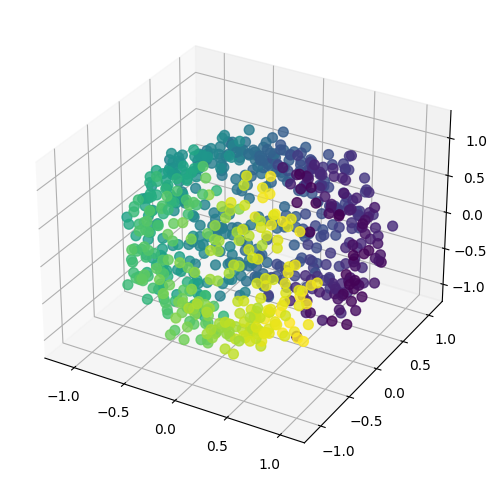

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=50, alpha=0.8)
plt.show()


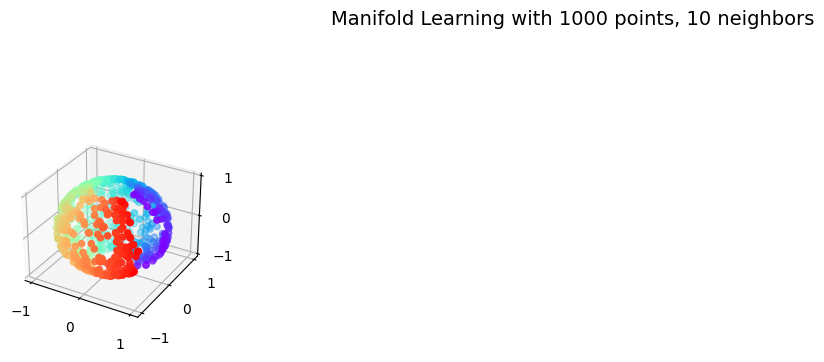

In [6]:
from sklearn import manifold
from sklearn.utils import check_random_state



n_neighbors = 10
n_samples = 1000


random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi


indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

ax = fig.add_subplot(251, projection='3d')
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)

Training with distance=0.5, epsilon=0.1,hiddenlayer=[64, 32]
Epoch [1/500], Loss: 0.6978
Epoch [50/500], Loss: 0.2006
Epoch [100/500], Loss: 0.2003
Epoch [150/500], Loss: 0.2023
Epoch [200/500], Loss: 0.2020
Epoch [250/500], Loss: 0.2032
Epoch [300/500], Loss: 0.2032
Epoch [350/500], Loss: 0.2029
Epoch [400/500], Loss: 0.2028
Epoch [450/500], Loss: 0.2025
Epoch [500/500], Loss: 0.2029
Training with distance=1, epsilon=0.1,hiddenlayer=[64, 32]
Epoch [1/500], Loss: 1.7973
Epoch [50/500], Loss: 0.2102
Epoch [100/500], Loss: 0.1443
Epoch [150/500], Loss: 0.1417
Epoch [200/500], Loss: 0.0613
Epoch [250/500], Loss: 0.0456
Epoch [300/500], Loss: 0.0574
Epoch [350/500], Loss: 0.0395
Epoch [400/500], Loss: 0.0407
Epoch [450/500], Loss: 0.0387
Epoch [500/500], Loss: 0.0386
Training with distance=2, epsilon=0.1,hiddenlayer=[64, 32]
Epoch [1/500], Loss: 0.9552
Epoch [50/500], Loss: 0.1178
Epoch [100/500], Loss: 0.0420
Epoch [150/500], Loss: 0.0281
Epoch [200/500], Loss: 0.0255
Epoch [250/500], Los

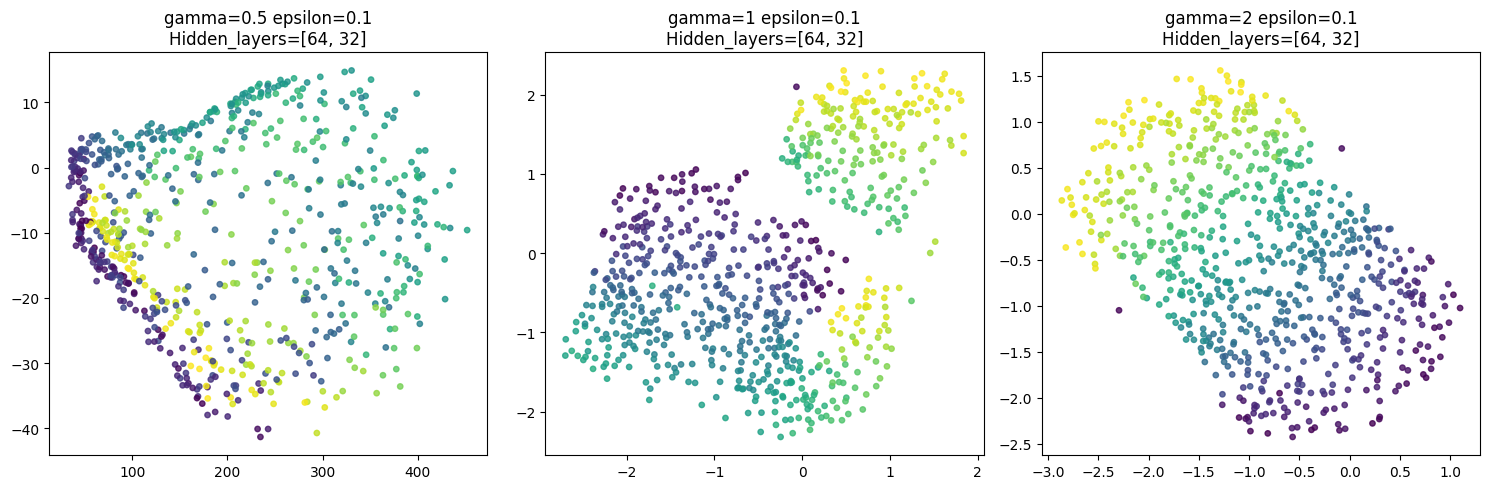

In [10]:
dis=[0.5,1,2]
hiddenlayers=[64,32]
epsilons=[0.1]
lr=0.05
scan_dis_epsilon_all(dis,epsilons,x_train,lr,epochs=500,hidden_layers=hiddenlayers)